In [ ]:
!pip install tensorflow keras opencv-python matplotlib

In [ ]:
!wget https://github.com/ardamavi/Sign-Language-Digits-Dataset/archive/master.zip
!unzip master.zip

--2024-11-14 16:31:46--  https://github.com/ardamavi/Sign-Language-Digits-Dataset/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ardamavi/Sign-Language-Digits-Dataset/zip/refs/heads/master [following]
--2024-11-14 16:31:46--  https://codeload.github.com/ardamavi/Sign-Language-Digits-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [     <=>            ]  16.43M  17.7MB/s    in 0.9s    

2024-11-14 16:31:48 (17.7 MB/s) - ‘master.zip’ saved [17231669]

Archive:  master.zip
4b09433ef9d5c60602e8805bb54b8aa2428527f8
   creating: Sign-Langua

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Set dataset path
dataset_path = 'Sign-Language-Digits-Dataset-master/Dataset'
images = []
labels = []

# Load dataset and preprocess images
for folder in os.listdir(dataset_path):
    label = int(folder)  # Folder names represent class labels (e.g., 0, 1, 2, etc.)
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # Resize images to 64x64 for CNN input
        images.append(img)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # Normalize pixel values
labels = to_categorical(labels)  # One-hot encoding of labels

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes for 10 digits in the dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.1493 - loss: 2.2814 - val_accuracy: 0.6174 - val_loss: 1.4879
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5175 - loss: 1.4058 - val_accuracy: 0.7240 - val_loss: 0.8624
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6733 - loss: 0.9817 - val_accuracy: 0.7579 - val_loss: 0.7137
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7571 - loss: 0.7728 - val_accuracy: 0.7772 - val_loss: 0.5849
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7867 - loss: 0.6497 - val_accuracy: 0.8063 - val_loss: 0.5323
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8319 - loss: 0.5370 - val_accuracy: 0.8426 - val_loss: 0.4638
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8406 - loss: 0.4650 - val_accuracy: 0.8329 - val_loss: 0.4672
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8717 - loss: 0.3925 - val_accuracy: 0.8596 - val_los

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3631 
Test accuracy: 0.8740919828414917


In [ ]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.90      0.95      0.93        40
           2       0.89      0.83      0.86        48
           3       0.97      0.89      0.93        37
           4       0.78      0.76      0.77        51
           5       0.91      0.96      0.93        45
           6       0.77      0.82      0.80        40
           7       0.90      0.76      0.83        34
           8       0.80      0.87      0.83        46
           9       0.91      0.91      0.91        32

    accuracy                           0.87       413
   macro avg       0.88      0.88      0.88       413
weighted avg       0.88      0.87      0.87       413



In [ ]:
model.save('sign_language_cnn_model.keras')

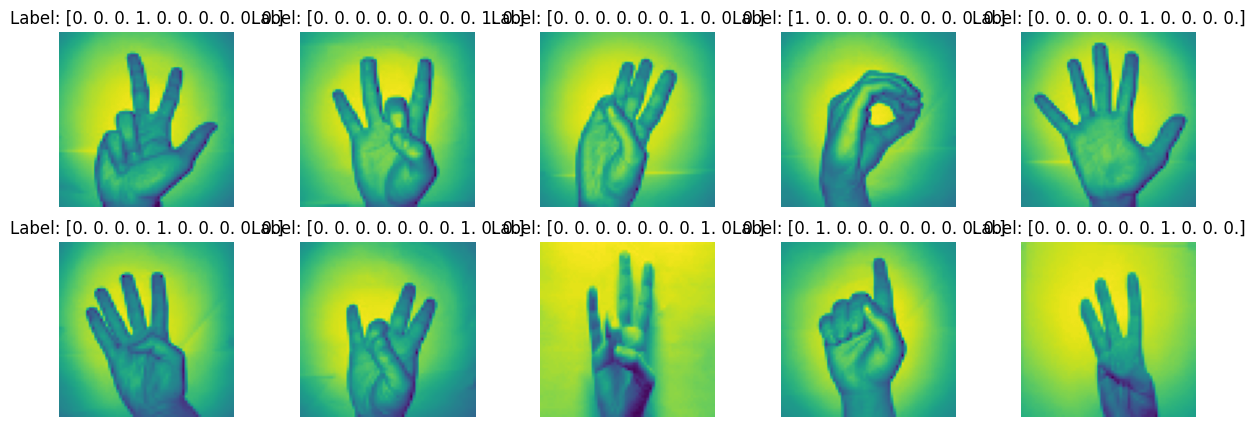

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Displaying a grid of sample images
num_images = 10  # Number of images you want to show
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()